In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
disaster = pd.read_csv('tweets.csv')
disaster.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
# Loading required features
disaster = disaster[['text','target']]
disaster.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
# Checking the Null Values
disaster.isna().sum()

text      0
target    0
dtype: int64

In [ ]:
# Checking the DF size
disaster.shape

(11370, 2)

In [ ]:
disaster['target'].value_counts()

target
0    9256
1    2114
Name: count, dtype: int64

In [ ]:
disaster['text'] = [entry.lower() for entry in disaster['text']]
disaster['text'].head()

<ipython-input-7-adae4c755979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster['text'] = [entry.lower() for entry in disaster['text']]


0    communal violence in bhainsa, telangana. "ston...
1    telangana: section 144 has been imposed in bha...
2    arsonist sets cars ablaze at dealership https:...
3    arsonist sets cars ablaze at dealership https:...
4    "lord jesus, your love brings freedom and pard...
Name: text, dtype: object

In [ ]:
# Loading packages for Tokenzation
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
disaster['text'] = [word_tokenize(entry) for entry in disaster['text']]

In [ ]:
disaster['text'].head()

0    [communal, violence, in, bhainsa, ,, telangana...
1    [telangana, :, section, 144, has, been, impose...
2    [arsonist, sets, cars, ablaze, at, dealership,...
3    [arsonist, sets, cars, ablaze, at, dealership,...
4    [``, lord, jesus, ,, your, love, brings, freed...
Name: text, dtype: object

In [ ]:
# POS & Stemming
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['j'] = wn.ADJ
tag_map['v'] = wn.VERB
tag_map['v'] = wn.ADV

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Storing all the stopwords into variables
stop_words = set(stopwords.words("english"))
print(stop_words)

{'some', 're', 'my', 't', 'needn', 'how', 'if', 'o', 'her', 'will', 'that', 'up', 'of', 'own', 'hadn', "wasn't", 'few', 'should', "you'll", 'weren', 'in', 'where', 'don', "haven't", "mightn't", 'won', 'them', 'by', 'between', "mustn't", "shouldn't", 'didn', 'having', 'ours', 'other', 'be', 'your', 'out', "should've", 'wasn', 'both', 'whom', 'what', "hadn't", "won't", 'so', 'who', 'had', 'down', 'all', "needn't", 'you', 'hers', 'their', "she's", "shan't", 'themselves', "that'll", 'after', 'can', 'on', 'no', 'are', 'same', 'into', 'do', 'wouldn', 'further', 'during', "didn't", 'and', "aren't", 'ain', 'theirs', "don't", 'have', 'there', 'doing', 'under', 'our', 'himself', 'to', 'being', 'been', 'above', 'each', 'than', 'shan', 'we', 'll', 'its', "hasn't", 'she', 'which', 'as', 'nor', 'yourself', 'me', 'again', 'ma', 'those', 'until', 'yourselves', 'too', "doesn't", "isn't", 'only', 'when', 'an', 'for', 'am', 'd', 'mightn', 'was', 'off', "couldn't", 'at', 'before', 'most', 'but', 'itself',

In [ ]:
for index,entry in enumerate(disaster['text']):
    Final_words = []
    word_lemmstized = WordNetLemmatizer()
    for word,tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_final = word_lemmstized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_final)
    disaster.loc[index,'text_final'] = str(Final_words)

In [ ]:
disaster.head()

,text,target,text_final
0,"[communal, violence, in, bhainsa, ,, telangana...",1,"['communal', 'violence', 'bhainsa', 'telangana..."
1,"[telangana, :, section, 144, has, been, impose...",1,"['telangana', 'section', 'imposed', 'bhainsa',..."
2,"[arsonist, sets, cars, ablaze, at, dealership,...",1,"['arsonist', 'set', 'car', 'ablaze', 'dealersh..."
3,"[arsonist, sets, cars, ablaze, at, dealership,...",1,"['arsonist', 'set', 'car', 'ablaze', 'dealersh..."
4,"[``, lord, jesus, ,, your, love, brings, freed...",0,"['lord', 'jesus', 'love', 'brings', 'freedom',..."


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
# splitting all the words from the data and assining those to Comment-words
comment_words = ' '
stopwords = set(STOPWORDS)

In [ ]:
for val in disaster.text_final:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

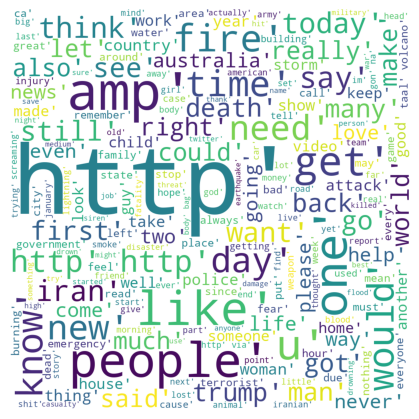

In [ ]:
wordcloud = WordCloud(width = 1000, height =1000, background_color = 'white',
                      stopwords = stopwords,min_font_size = 10).generate(comment_words)


plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Naive Bayes Model Building & Testing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection,naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(disaster['text_final'],disaster['target'],test_size = 0.3)
encoder = LabelEncoder()
Train_Y = encoder.fit_transform(Train_Y)
Test_Y = encoder.fit_transform(Test_Y)

In [ ]:
y = Train_Y.tolist()

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features = 5000)
Tfidf_vect.fit(disaster['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
data = Train_X_Tfidf.toarray()
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
naive = naive_bayes.MultinomialNB()
naive.fit(Train_X_Tfidf,Train_Y)

MultinomialNB()

In [ ]:
predictions_NB = naive.predict(Test_X_Tfidf)

In [ ]:
print("Model Accuracy : ",accuracy_score(predictions_NB,Test_Y)*100)

Model Accuracy :  86.80738786279683


In [ ]:
# Import necessary libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Function to preprocess user input
def preprocess_input(tweet):
    tweet = tweet.lower()  # Convert to lowercase
    tokens = word_tokenize(tweet)  # Tokenization
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tag_map = defaultdict(lambda: 'n')
    tag_map['J'] = 'a'
    tag_map['V'] = 'v'
    tag_map['R'] = 'r'

    final_tokens = []
    for word, tag in nltk.pos_tag(tokens):
        if word.isalpha() and word not in stop_words:
            final_word = lemmatizer.lemmatize(word, tag_map.get(tag[0].upper(), 'n'))
            final_tokens.append(final_word)

    return ' '.join(final_tokens)

In [ ]:
# Function to classify user input
def classify_tweet(tweet, vectorizer, model, encoder):
    preprocessed_tweet = preprocess_input(tweet)
    vectorized_tweet = vectorizer.transform([preprocessed_tweet])
    prediction = model.predict(vectorized_tweet)
    predicted_class = encoder.inverse_transform(prediction)
    return predicted_class[0]

In [ ]:
# Sample code to use the functions
tweet_input = input("Enter your tweet: ")


In [ ]:
# Preprocess and classify
predicted_class = classify_tweet(tweet_input, Tfidf_vect, naive, encoder)

In [ ]:
# Display result
print(f"Predicted class for the tweet: {predicted_class}")

Predicted class for the tweet: 1


In [ ]:
# Sample code to use the functions
tweet_input = input("Enter your tweet: ")

In [ ]:
# Preprocess and classify
predicted_class = classify_tweet(tweet_input, Tfidf_vect, naive, encoder)


In [ ]:
# Display result
print(f"Predicted class for the tweet: {predicted_class}")